In [5]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np


V = 0.01


def true_lnz(dim, v=V):
    return (dim / 2) * (np.log(v) - np.log(1 + v))

data = pd.read_csv("simulation_study.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'simulation_study.csv'

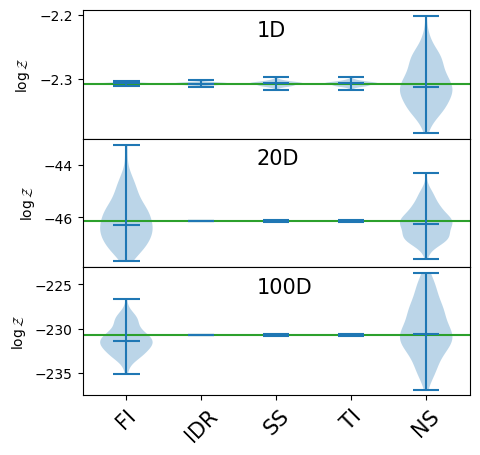

In [80]:

def plot(data, cols=['FI', 'IDR', 'SS', 'TI', 'NS']):
    data = data.sort_values(by='dim')
    unique_dims = data['dim'].unique()
    fig, axes = plt.subplots(nrows=len(unique_dims), ncols=1, figsize=(5, 5), sharex=True,
                            gridspec_kw={'hspace': 0})  # Set hspace to 0 to remove vertical space
    for i, dim in enumerate(unique_dims):
        ax = axes[i]
        ax.axhline(true_lnz(dim), color="tab:green")
        dim_data = data[data['dim'] == dim]
        dim_data = dim_data[cols]
        ax.violinplot(
            dim_data,
            showmedians=True, 
            widths=0.7
        )        

        ax.set_xticks(range(1, len(cols) + 1))  # Set the tick positions
        ax.set_xticklabels(cols, rotation=45, fontsize=15)  # Set the tick labels
        ax.set_ylabel(r"$\log\mathcal{Z}$", labelpad=5)

        ax.text(0.45, 0.8, f'{dim}D', size=15, transform = ax.transAxes)

    plt.show()
    
plot(data)